In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [2]:
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools

In [3]:
function reshape2d_4d(img::AbstractArray)
    reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

In [54]:
img = convert(Array{Float32,2}, load(datadir("temp_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)
r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

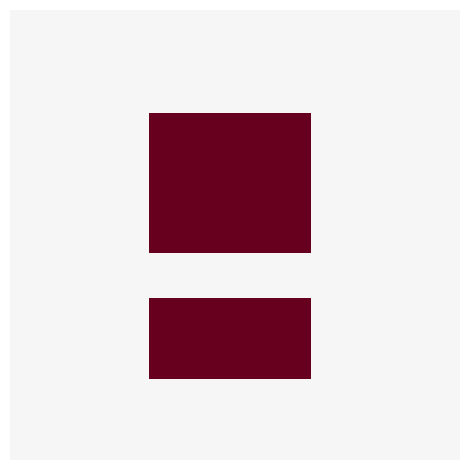

In [55]:
Utils.plot_rb(img[:,:,1,1])

In [73]:
tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [74]:
arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

In [75]:
f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

In [76]:
prob = ODEProblem(f, u0, tspan, p);

In [77]:
@time sol = solve(prob)

 10.270360 seconds (13.77 M allocations: 681.817 MiB, 3.44% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 451-element Array{Float32,1}:
   0.0
   1.0f-6
   8.8210245f-6
   5.6381334f-5
   0.0002767714
   0.0011106943
   0.004022967
   0.013026948
   0.036681727
   0.09349184
   0.21312559
   0.3943261
   0.62800264
   ⋮
 487.6899
 488.83472
 489.97952
 491.12433
 492.26913
 493.41394
 494.55875
 495.70355
 496.84836
 497.99316
 499.13797
 500.0
u: 451-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 …

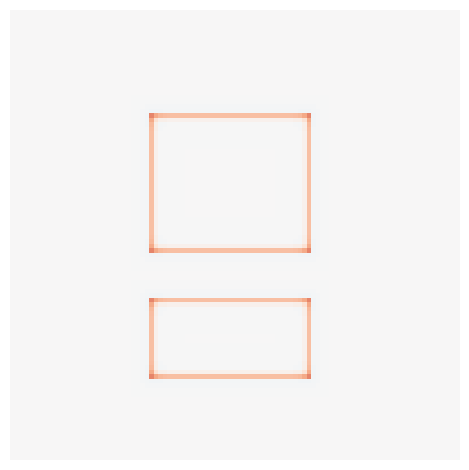

In [85]:
Utils.plot_rb(sol[end][:,:,11,1])

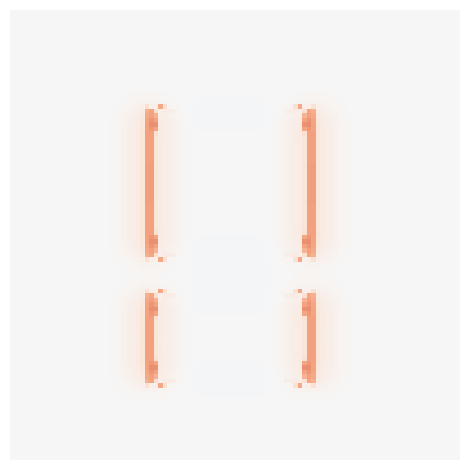

In [86]:
Utils.plot_rb(sol[end][:,:,7,1])

In [89]:
out = sol[end][:,:,7,1] .+ sol[end][:,:,8,1] .-sol[end][:,:,11,1] .- sol[end][:,:,12,1];

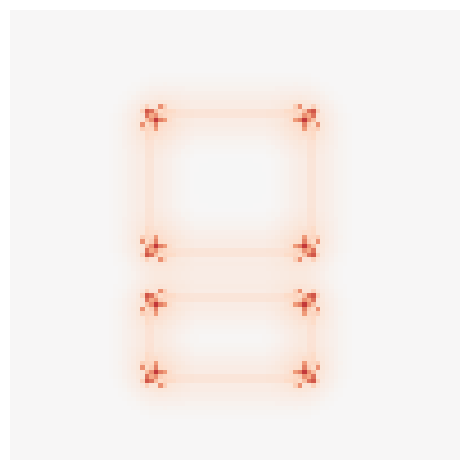

In [91]:
Utils.plot_rb(out)

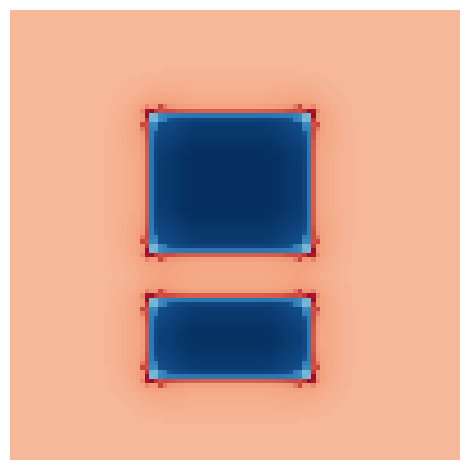

In [96]:
iimg = img .* 2;
out = sol[end][:,:,7,1] .+ sol[end][:,:,8,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

In [97]:
img = convert(Array{Float32,2}, load(datadir("temp1_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)
r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

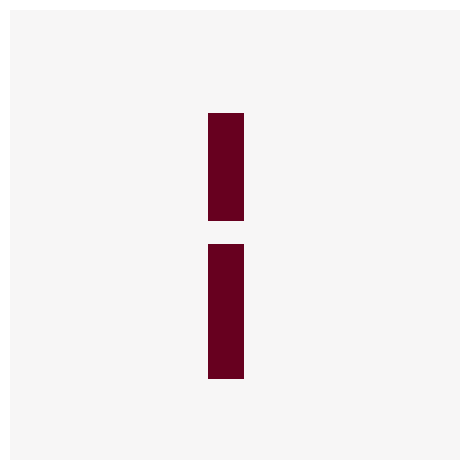

In [98]:
Utils.plot_rb(img[:,:,1,1])

In [99]:
tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [100]:
arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

In [101]:
f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

In [102]:
prob = ODEProblem(f, u0, tspan, p);

In [103]:
@time sol = solve(prob)

 11.574655 seconds (16.08 M allocations: 798.598 MiB, 2.30% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 529-element Array{Float32,1}:
   0.0
   1.0f-6
   9.039178f-6
   5.9783903f-5
   0.0003111815
   0.0013068459
   0.0045848466
   0.015092434
   0.04480484
   0.11611186
   0.24931505
   0.40120035
   0.6657262
   ⋮
 489.32996
 490.3033
 491.27664
 492.24863
 493.21857
 494.18686
 495.1549
 496.12415
 497.09528
 498.06802
 499.04138
 500.0
u: 529-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0

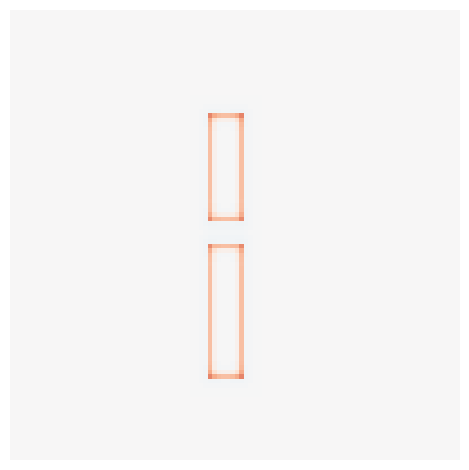

In [104]:
Utils.plot_rb(sol[end][:,:,11,1])

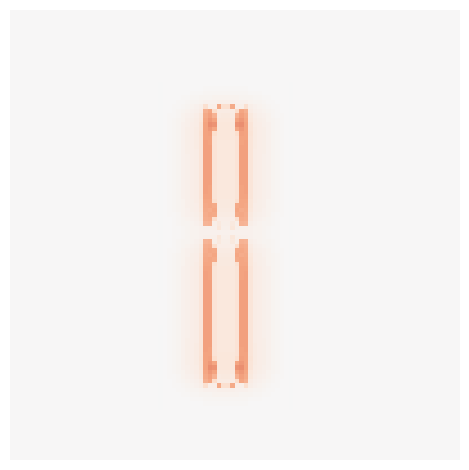

In [105]:
Utils.plot_rb(sol[end][:,:,7,1])

In [106]:
out = sol[end][:,:,7,1] .+ sol[end][:,:,8,1] .-sol[end][:,:,11,1] .- sol[end][:,:,12,1];

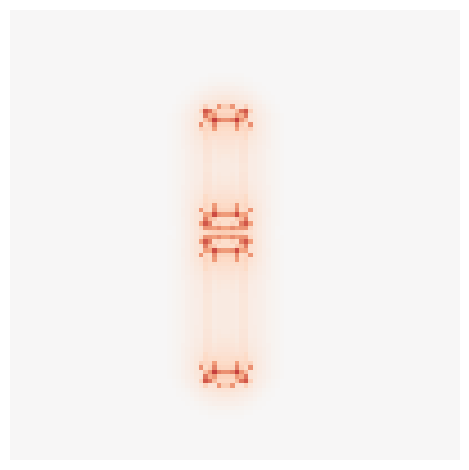

In [107]:
Utils.plot_rb(out)

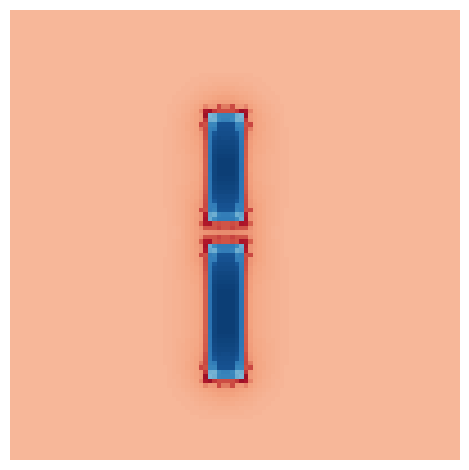

In [108]:
iimg = img .* 2;
out = sol[end][:,:,7,1] .+ sol[end][:,:,8,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

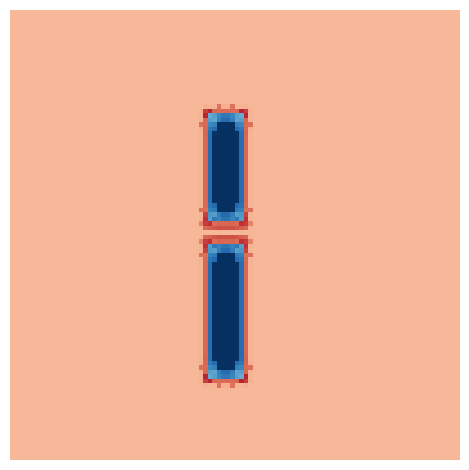

In [109]:
out = sol[end][:,:,1,1] .+ sol[end][:,:,2,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

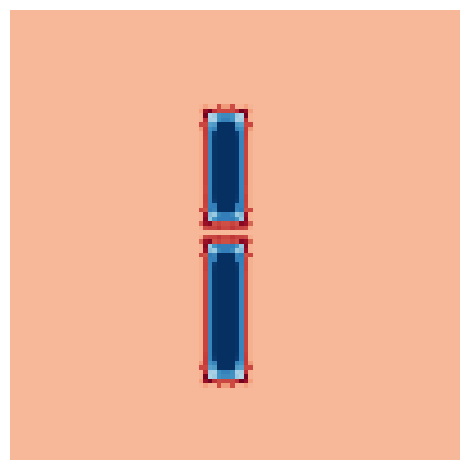

In [110]:
out = sol[end][:,:,3,1] .+ sol[end][:,:,4,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

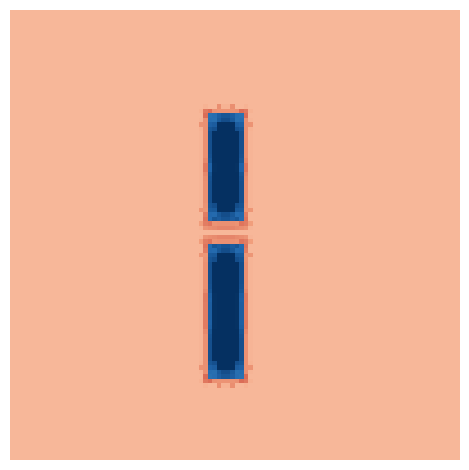

In [111]:
out = sol[end][:,:,5,1] .+ sol[end][:,:,6,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

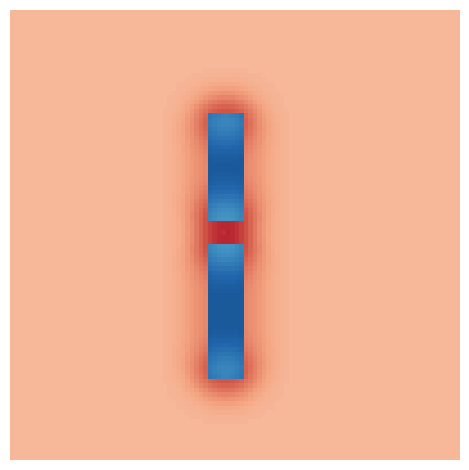

In [112]:
out = sol[end][:,:,9,1] .+ sol[end][:,:,10,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

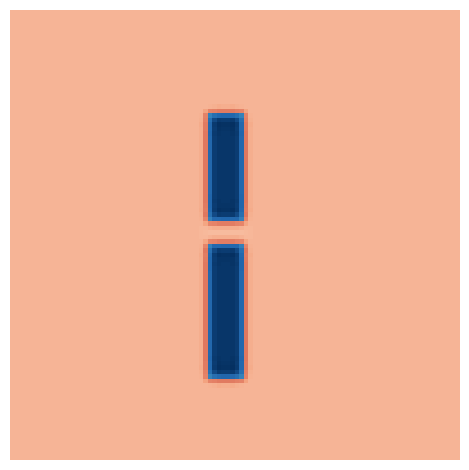

In [114]:
out = sol[end][:,:,11,1] .+ sol[end][:,:,12,1] .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.04)

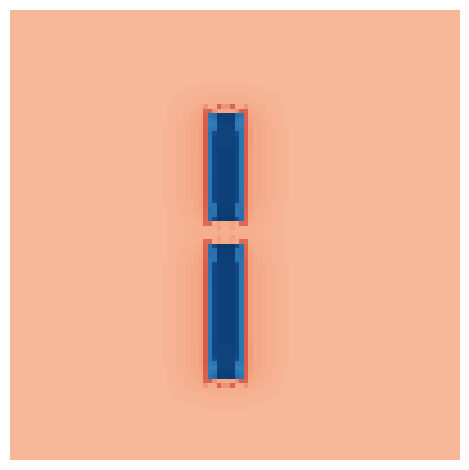

In [115]:
out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
Utils.plot_rb(out, axMin=-2.0)

In [132]:
img = convert(Array{Float32,2}, load(datadir("temp1_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

100×100×1×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [133]:
img = img .* 0.2f0

100×100×1×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [134]:
r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

In [137]:
tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob)

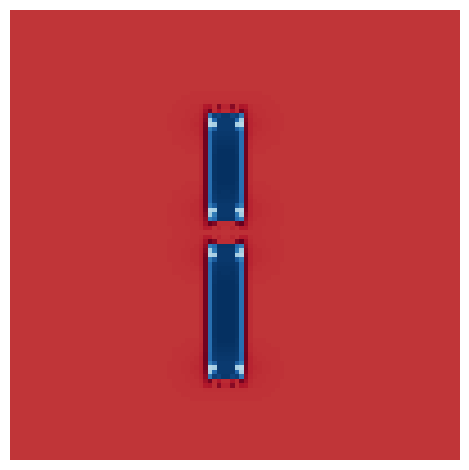

In [145]:
iimg = img .* 5;
out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
outmx = findmax(out)
outmn = findmin(out)
Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

In [140]:
findmax(sol[end][:,:,7,1])

(0.4160019f0, CartesianIndex(26, 52))

In [44]:
img = convert(Array{Float32,2}, load(datadir("temp2_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

  9.210046 seconds (11.74 M allocations: 582.870 MiB, 1.80% gc time)


In [45]:
# iimg = img .* 5;
# out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
# outmx = findmax(out)
# outmn = findmin(out)
# Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

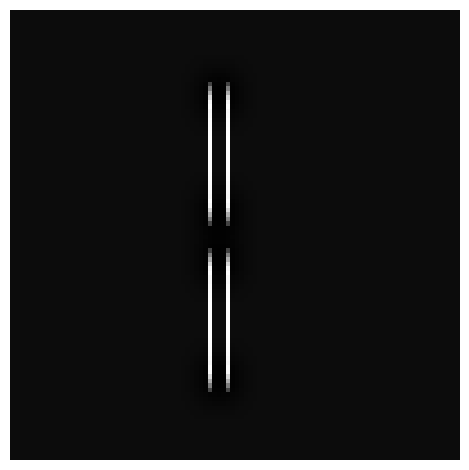

In [46]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

In [60]:
img = convert(Array{Float32,2}, load(datadir("temp3_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

 10.971226 seconds (14.02 M allocations: 695.053 MiB, 1.89% gc time)


In [61]:
# iimg = img .* 5;
# out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
# outmx = findmax(out)
# outmn = findmin(out)
# Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

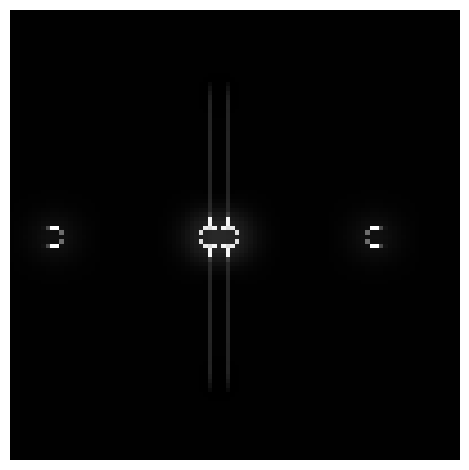

In [62]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

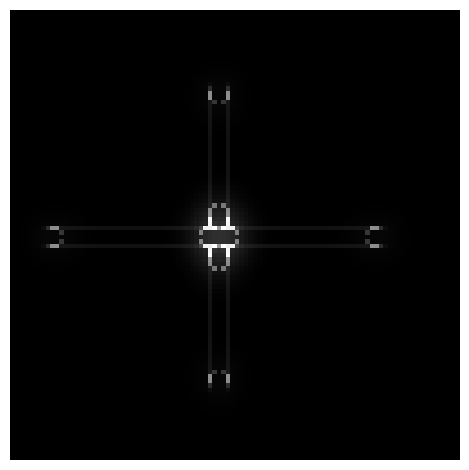

In [64]:
Utils.plot_gs(sol[end][:,:,7,1] .+ sol[end][:,:,8,1], axMax=findmax(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1], axMin=findmin(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1])

In [65]:
img = convert(Array{Float32,2}, load(datadir("temp4_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

 10.394799 seconds (13.22 M allocations: 653.927 MiB, 7.49% gc time)


In [66]:
# iimg = img .* 5;
# # out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
# # outmx = findmax(out)
# # outmn = findmin(out)
# # Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

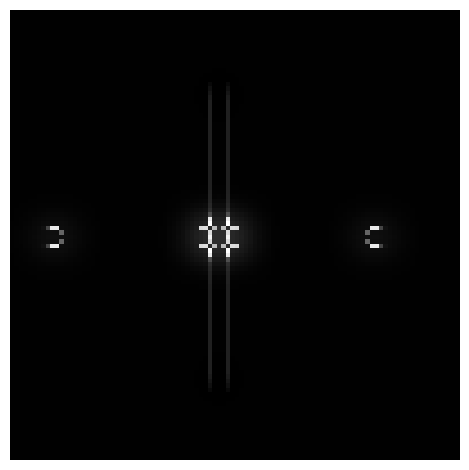

In [52]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

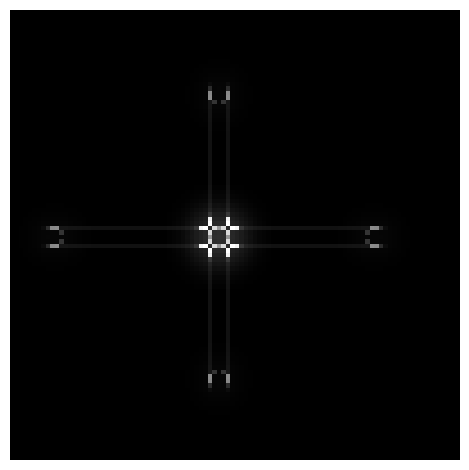

In [67]:
Utils.plot_gs(sol[end][:,:,7,1] .+ sol[end][:,:,8,1], axMax=findmax(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1], axMin=findmin(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1])

In [68]:
img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 1000f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

 19.986108 seconds (25.06 M allocations: 1.210 GiB, 2.12% gc time)


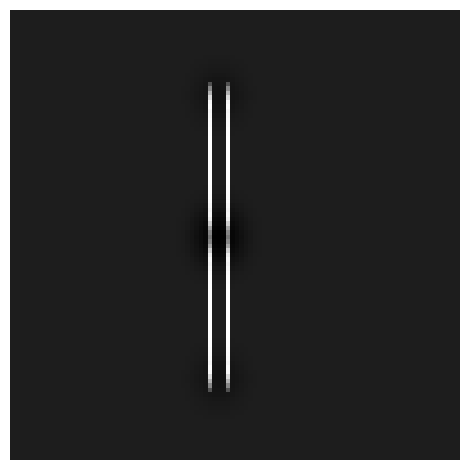

In [69]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

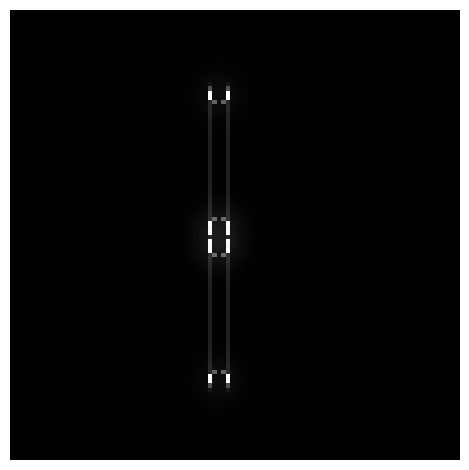

In [70]:
Utils.plot_gs(sol[end][:,:,7,1] .+ sol[end][:,:,8,1], axMax=findmax(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1], axMin=findmin(sol[end][:,:,7,1] .+ sol[end][:,:,8,1])[1])

In [54]:
iimg = img .* 5;
out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];

# Utils.plot_gs(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

In [56]:
img = convert(Array{Float32,2}, load(datadir("temp3_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

  9.894149 seconds (14.03 M allocations: 697.535 MiB, 7.68% gc time)


In [57]:
# iimg = img .* 5;
# out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
# outmx = findmax(out)
# outmn = findmin(out)
# Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

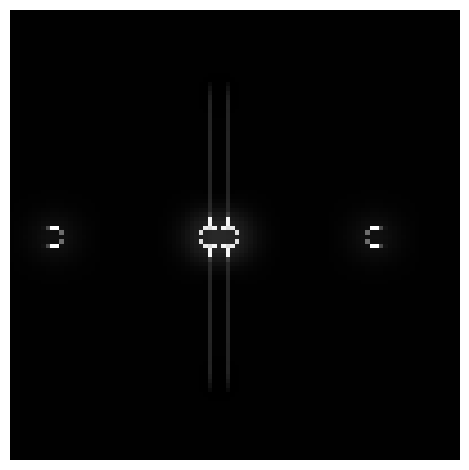

In [58]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

In [59]:
img = convert(Array{Float32,2}, load(datadir("temp3_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

  9.139755 seconds (13.99 M allocations: 694.449 MiB, 2.10% gc time)


In [ ]:
iimg = img .* 5;
out = sol[end][:,:,7,1]  .- iimg[:,:,1,1];
outmx = findmax(out)
outmn = findmin(out)
Utils.plot_rb(out, axMax=findmax(out)[1], axMin=findmin(out)[1])

In [78]:
img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 1000f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob)

 18.674482 seconds (25.02 M allocations: 1.210 GiB, 5.74% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 816-element Array{Float32,1}:
    0.0
    1.0f-6
    8.414628f-6
    5.1463838f-5
    0.0002625384
    0.0011154511
    0.004530169
    0.01524444
    0.045014914
    0.09819057
    0.1656858
    0.25060657
    0.4052239
    ⋮
  986.403
  987.65515
  988.9073
  990.1594
  991.41156
  992.66376
  993.9159
  995.1681
  996.4203
  997.6725
  998.9246
 1000.0
u: 816-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0

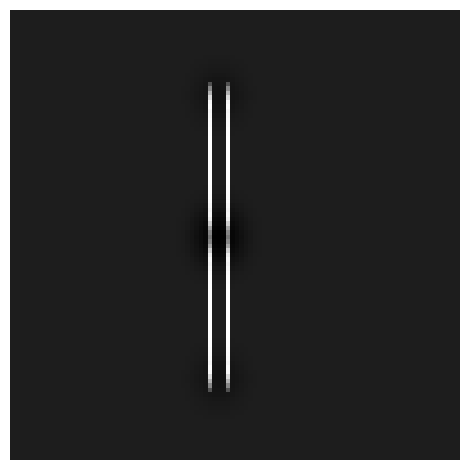

In [79]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

In [80]:
findmax(sol[end][:,:,7,1])

(0.055913348f0, CartesianIndex(35, 45))

In [85]:
findmax(sol[35,45,7,1,:])

(0.055913378f0, 150)

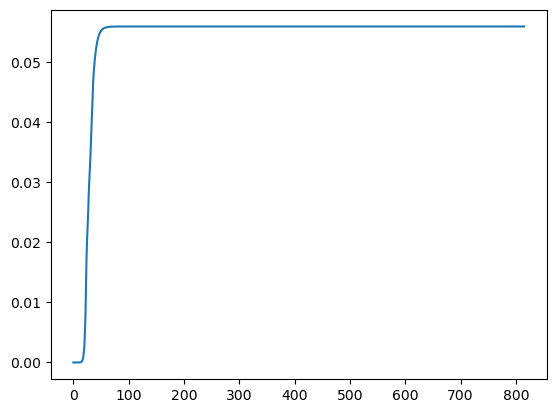

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facdd4e1750>

In [84]:
plot(sol[35,45,7,1,:])

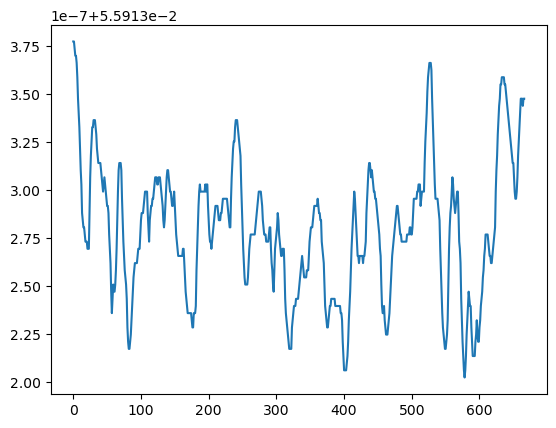

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd8cf35d0>

In [91]:
plot(sol[35,45,7,1,150:end])

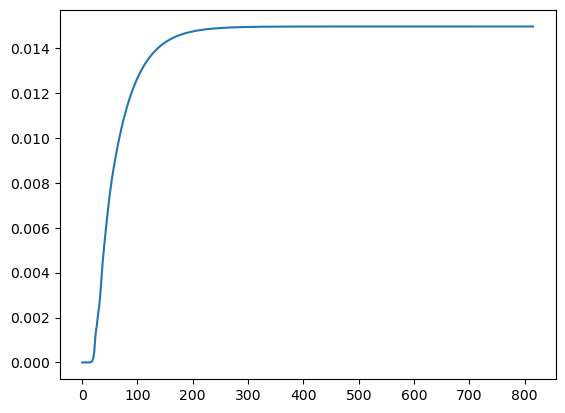

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd8ad2f50>

In [98]:
plot(sol[35,45,5,1,:])

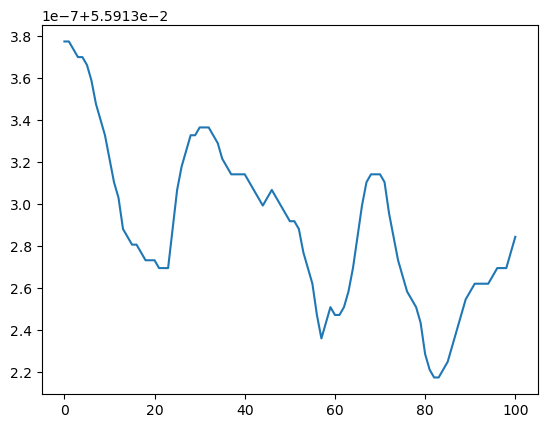

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd8d81490>

In [90]:
plot(sol[35,45,7,1,150:250])


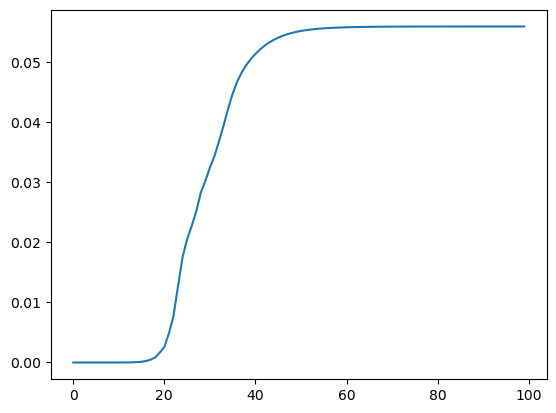

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facdd988cd0>

In [86]:
plot(sol[35,45,7,1,1:00])

In [99]:
img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 5f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);
@time sol = solve(prob);

  0.668700 seconds (650.73 k allocations: 33.269 MiB)


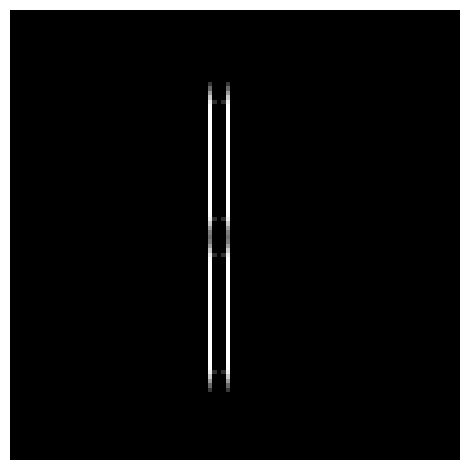

In [100]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

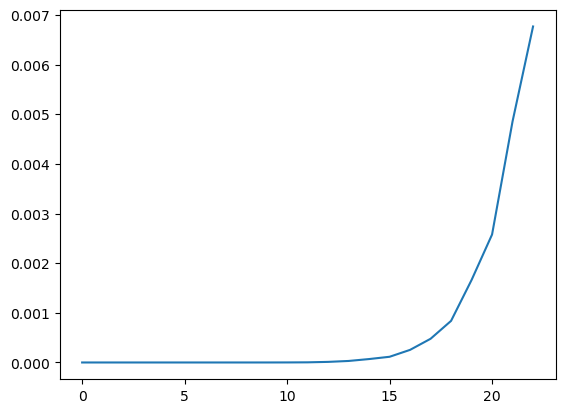

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd89d7490>

In [107]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

# Stopping

In [4]:
img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 500f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [124]:
@time sol = solve(prob);

 10.340252 seconds (12.78 M allocations: 633.204 MiB, 2.09% gc time)


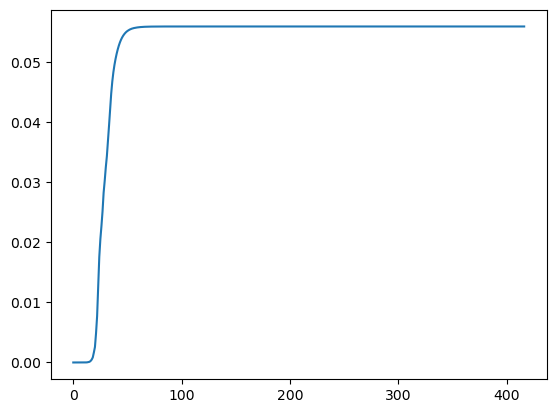

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facdd9918d0>

In [117]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

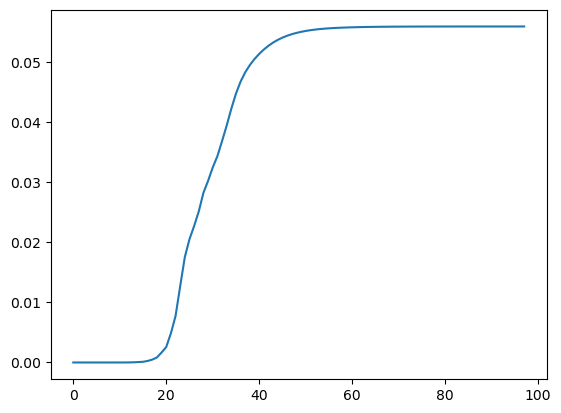

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd883e310>

In [120]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

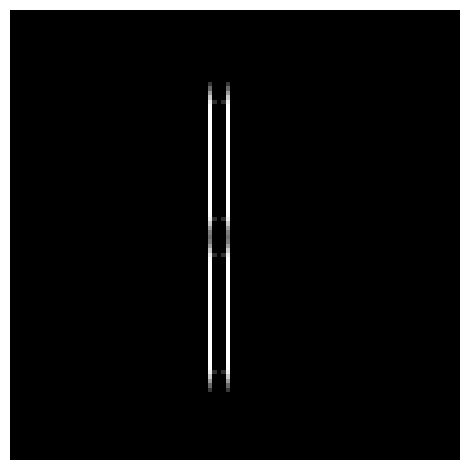

In [114]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

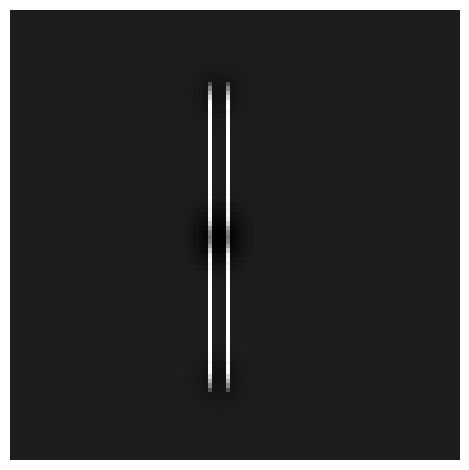

In [121]:
Utils.plot_gs(sol[end][:,:,7,1], axMax=findmax(sol[end][:,:,7,1])[1], axMin=findmin(sol[end][:,:,7,1])[1])

In [122]:
sol_t100 = Array(sol);

In [125]:
sol_t500 = Array(sol);

In [128]:
sol_t100[end] ≈ sol_t500[end]

true

In [129]:
sol_t500[end] ≈ sol_t500[end-100]

true

In [135]:
sol = solve(prob,alg=lsoda())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [137]:
sol_lsoda = Array(sol);

In [138]:
sol_lsoda[end] ≈ sol_t500[end]

true

In [140]:
@test sol_lsoda[end] ≈ sol_t500[1]

Test Passed

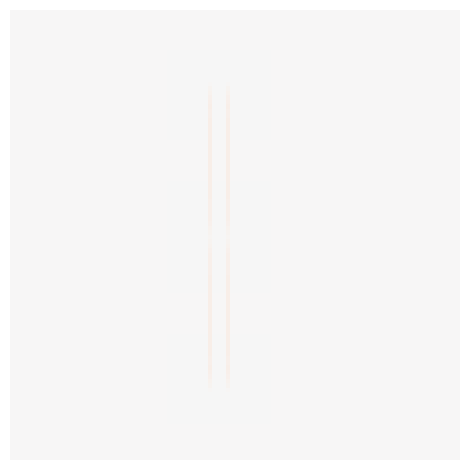

In [143]:
Utils.plot_rb(sol[end][:,:,7,1])

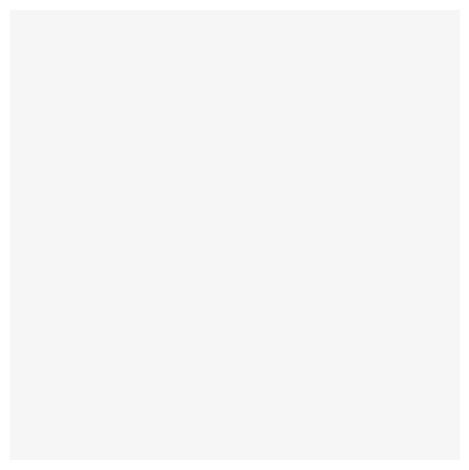

In [144]:
Utils.plot_rb(sol[1][:,:,7,1])

In [145]:
sol[1][:,:,7,1] ≈ sol[end][:,:,7,1]

false

In [185]:
for t in 1:50
    for k in 1:12
    @test sol_lsoda[:,:,k,1,end-t] ≈ sol_lsoda[:,:,k,1,end-1]
end
end

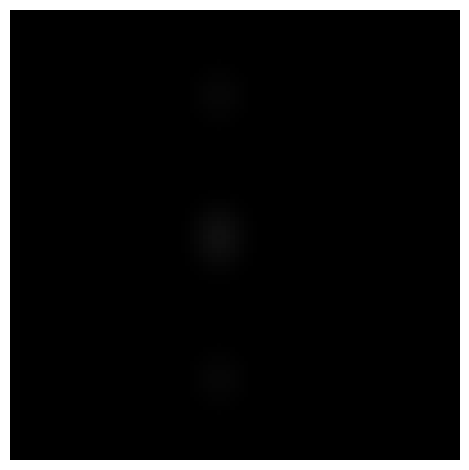

In [175]:
Utils.plot_gs(sol[:,:,10,1,end-1])

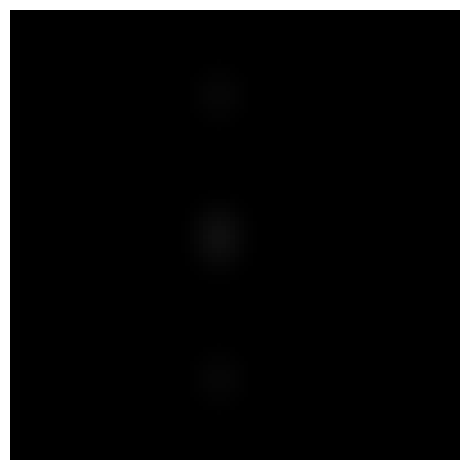

In [174]:
Utils.plot_gs(sol[:,:,10,1,end])

In [187]:
tmp = similar(sol_lsoda[:,:,10,1,end])
@. tmp = sol_lsoda[:,:,10,1,end-1] - sol_lsoda[:,:,10,1,end];
findmax(tmp)

(1.1175871f-7, CartesianIndex(49, 45))

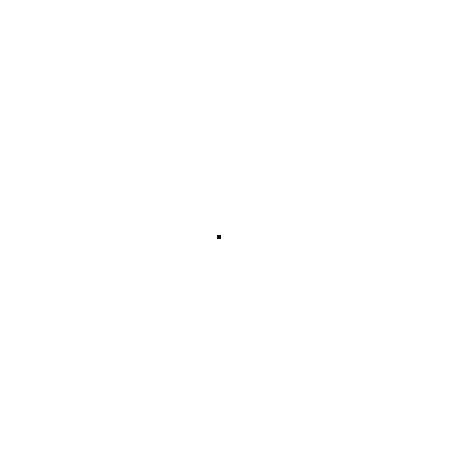

In [190]:
Utils.plot_gs(tmp,axMin=-0.009, axMax=1.2f-7)

In [191]:
tmp

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [5]:
@time sol = solve(prob,alg=lsoda())

102.094856 seconds (131.14 M allocations: 6.407 GiB, 4.02% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [9]:
@time sol = solve(prob)

 10.490662 seconds (12.82 M allocations: 633.665 MiB, 2.56% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [10]:
@time sol = solve(prob,DynamicSS(lsoda()))

 10.483996 seconds (12.77 M allocations: 632.943 MiB, 2.52% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [6]:
prob_ss = SteadyStateProblem(prob)

SteadyStateProblem with uType CuArray{Float32,4,Nothing}
u0: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [7]:
@time sol = solve(prob_ss,DynamicSS(lsoda()))

ErrorException: LSODA is not compatible with callbacks.

In [8]:
@time sol = solve(prob_ss, SSRootfind())

InterruptException: InterruptException:

In [11]:
@time sol = solve(prob,alg=Tsit5())

 10.180760 seconds (12.82 M allocations: 634.925 MiB, 3.44% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [10]:
sol = solve(prob_ss,DynamicSS(Tsit5()))

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


InterruptException: InterruptException:

In [16]:
cb = TerminateSteadyState()

DiscreteCallback{DiffEqCallbacks.var"#56#58"{Float64,Float64,typeof(DiffEqCallbacks.allDerivPass)},DiffEqCallbacks.var"#57#59",typeof(DiffEqBase.INITIALIZE_DEFAULT)}(DiffEqCallbacks.var"#56#58"{Float64,Float64,typeof(DiffEqCallbacks.allDerivPass)}(1.0e-8, 1.0e-6, DiffEqCallbacks.allDerivPass), DiffEqCallbacks.var"#57#59"(), DiffEqBase.INITIALIZE_DEFAULT, Bool[1, 0])

In [17]:
@time sol = solve(prob, callback=cb)

 68.499910 seconds (27.37 M allocations: 1.215 GiB, 1.13% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [19]:
@time sol = solve(prob, AutoTsit5(Rosenbrock23()))

OutOfGPUMemoryError: Out of GPU memory trying to allocate 53.644 GiB
Effective GPU memory usage: 59.93% (6.695 GiB/11.172 GiB)
CUDA allocator usage: 6.541 GiB
BinnedPool usage: 6.541 GiB (6.541 GiB allocated, 0 bytes cached)


In [21]:
@time sol = solve(prob, AutoVern7(Rodas5()))

OutOfGPUMemoryError: Out of GPU memory trying to allocate 53.644 GiB
Effective GPU memory usage: 59.97% (6.700 GiB/11.172 GiB)
CUDA allocator usage: 6.545 GiB
BinnedPool usage: 6.545 GiB (6.545 GiB allocated, 0 bytes cached)


In [ ]:
# @time sol = solve(prob, lsoda())

In [7]:
@time sol = solve(prob, CVODE_BDF())

MethodError: MethodError: no method matching Sundials.FunJac(::Sundials.var"#27#31"{ODEProblem{CuArray{Float32,4,Nothing},Tuple{Float32,Float32},true,NamedTuple{(:K, :δ_v, :δ_c, :δ_m, :δ_z, :δ_s, :σ_1, :C_1, :C_2, :σ_2, :γ, :α, :ϕ, :Γ, :v_21, :μ, :ν, :n, :att, :η_p, :η_m, :λ, :a_23_ex, :a_23_in, :v12_6, :v12_4, :ψ, :C_AB_l, :H_σ_x, :H_σ_y, :H_fact, :H_l, :T_fact, :T_p_m, :T_v2_fact, :H_size, :W_size, :lgn_equ_u, :lgn_equ_A, :lgn_equ_B, :filling, :W_l, :k_gauss_1, :k_gauss_2, :k_C_A, :k_C_B, :k_x_lgn, :k_W_p, :k_W_m, :k_H, :k_T_p, :k_T_m, :k_T_p_v2, :k_T_m_v2, :dim_i, :dim_j, :x_V2, :ν_pw_n, :I, :r),Tuple{Int64,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int64,Float32,Float32,Float32,Int64,Array{Float32,1},Float32,Float32,Int64,Int64,Float32,Float32,Float32,String,Int64,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},Int64,Int64,CuArray{Float32,4,Nothing},Float32,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing}}},ODEFunction{true,MEngProject.LaminartGPU.LamFunction{CuArray{Float32,4,Nothing}},LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},DiffEqBase.StandardODEProblem},NTuple{4,Int64}}, ::Nothing, ::Nothing, ::NamedTuple{(:K, :δ_v, :δ_c, :δ_m, :δ_z, :δ_s, :σ_1, :C_1, :C_2, :σ_2, :γ, :α, :ϕ, :Γ, :v_21, :μ, :ν, :n, :att, :η_p, :η_m, :λ, :a_23_ex, :a_23_in, :v12_6, :v12_4, :ψ, :C_AB_l, :H_σ_x, :H_σ_y, :H_fact, :H_l, :T_fact, :T_p_m, :T_v2_fact, :H_size, :W_size, :lgn_equ_u, :lgn_equ_A, :lgn_equ_B, :filling, :W_l, :k_gauss_1, :k_gauss_2, :k_C_A, :k_C_B, :k_x_lgn, :k_W_p, :k_W_m, :k_H, :k_T_p, :k_T_m, :k_T_p_v2, :k_T_m_v2, :dim_i, :dim_j, :x_V2, :ν_pw_n, :I, :r),Tuple{Int64,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int64,Float32,Float32,Float32,Int64,Array{Float32,1},Float32,Float32,Int64,Int64,Float32,Float32,Float32,String,Int64,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing},Int64,Int64,CuArray{Float32,4,Nothing},Float32,CuArray{Float32,4,Nothing},CuArray{Float32,4,Nothing}}}, ::Nothing, ::Nothing, ::Nothing, ::Nothing, ::CuArray{Float32,1,CuArray{Float32,4,Nothing}}, ::CuArray{Float32,1,Nothing}, ::Nothing)
Closest candidates are:
  Sundials.FunJac(::F, ::F2, ::J, ::P, ::M, ::J2, ::Prec, ::PS, ::uType, !Matched::uType, ::uType2) where {F, F2, J, P, M, J2, uType, uType2, Prec, PS} at /mnt/storage_1/users/cullinanen/.julia/packages/Sundials/UNvwn/src/common_interface/function_types.jl:3
  Sundials.FunJac(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any) at /mnt/storage_1/users/cullinanen/.julia/packages/Sundials/UNvwn/src/common_interface/function_types.jl:16
  Sundials.FunJac(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any) at /mnt/storage_1/users/cullinanen/.julia/packages/Sundials/UNvwn/src/common_interface/function_types.jl:15

In [12]:
@time sol = solve(prob, abstol = 1e-8, reltol = 1e-5)

InterruptException: InterruptException:

In [13]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

UndefVarError: UndefVarError: sol not defined

In [14]:
@time sol = solve(prob, abstol = 1e-3)

 14.865453 seconds (19.78 M allocations: 965.509 MiB, 2.50% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 479-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.008444467
   0.05300148
   0.23468995
   0.58422405
   1.0262994
   1.6225157
   2.3762665
   3.3695972
   ⋮
 488.33942
 489.51706
 490.66998
 491.75018
 492.7571
 493.71628
 494.67838
 495.65363
 496.67105
 497.75778
 498.91025
 500.0
u: 479-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0

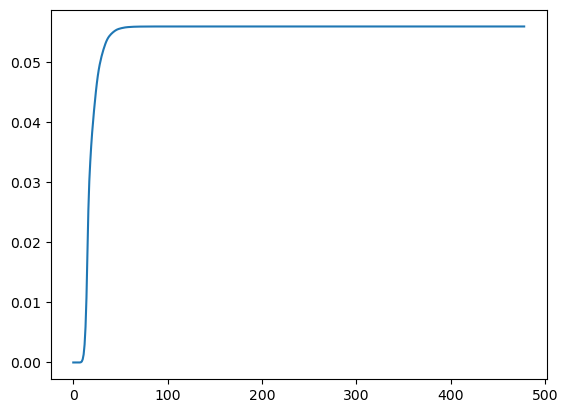

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f49fbaf0a10>

In [15]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [16]:
@time sol = solve(prob, abstol = 1e-7)

  9.556657 seconds (12.90 M allocations: 638.215 MiB, 2.33% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 421-element Array{Float32,1}:
   0.0
   1.0f-6
   6.3763514f-6
   3.071458f-5
   0.00013280145
   0.00049340597
   0.0016896679
   0.00510484
   0.01385349
   0.034165706
   0.06112948
   0.11766306
   0.16847746
   ⋮
 486.67755
 487.93015
 489.18274
 490.43533
 491.68796
 492.94058
 494.19318
 495.44577
 496.69836
 497.95096
 499.20355
 500.0
u: 421-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.

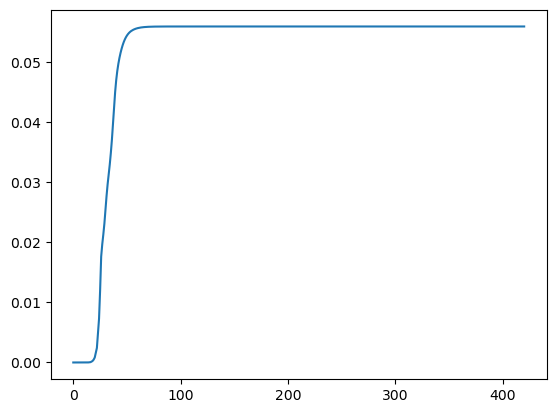

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f49fba9b3d0>

In [17]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [22]:
@time sol = solve(prob, abstol = 1f-15)

 11.885193 seconds (14.04 M allocations: 696.345 MiB, 2.85% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 453-element Array{Float32,1}:
   0.0
   1.0f-6
   2.9443922f-6
   6.563028f-6
   1.2465297f-5
   2.1730315f-5
   3.2748754f-5
   4.8807506f-5
   7.1235525f-5
   0.00010055366
   0.0001480152
   0.00021950644
   0.00031703935
   ⋮
 486.6662
 487.91885
 489.1715
 490.42416
 491.67682
 492.92947
 494.18213
 495.43478
 496.68744
 497.9401
 499.19275
 500.0
u: 453-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.

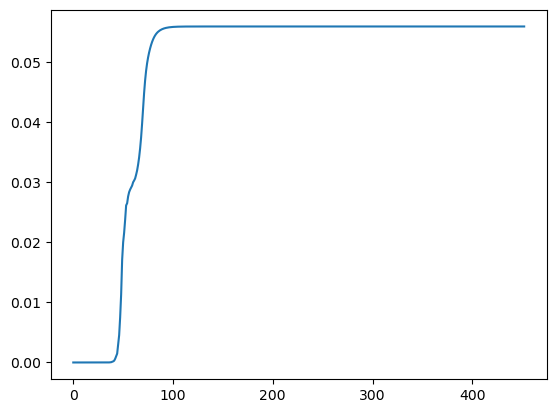

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f49dff40c10>

In [23]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [24]:
@time sol = solve(prob, abstol = 1f-15, reltol = 1e-5)

OutOfGPUMemoryError: Out of GPU memory trying to allocate 468.750 KiB
Effective GPU memory usage: 100.00% (11.172 GiB/11.172 GiB)
CUDA allocator usage: 11.016 GiB
BinnedPool usage: 11.016 GiB (11.016 GiB allocated, 0 bytes cached)


In [7]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [5]:
@time sol = solve(prob, reltol = 1e-1)

 93.064488 seconds (118.81 M allocations: 5.854 GiB, 3.81% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 515-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.009860678
   0.027166262
   0.055150606
   0.10373247
   0.16209392
   0.2582437
   0.44623917
   0.7010611
   ⋮
 489.98865
 490.96884
 491.96667
 492.94687
 493.9447
 494.9249
 495.92273
 496.90292
 497.90076
 498.88095
 499.87878
 500.0
u: 515-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 

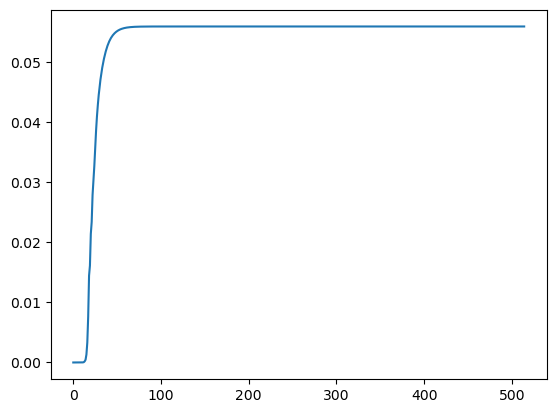

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd05c95f7d0>

In [6]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [8]:
@time sol = solve(prob, reltol = 1e-8)

 30.152627 seconds (43.82 M allocations: 2.022 GiB, 3.62% gc time)


retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 379-element Array{Float32,1}:
   0.0
   1.0f-6
   5.698426f-6
   2.559697f-5
   9.1070455f-5
   0.0002973589
   0.0008468375
   0.0021305147
   0.005140352
   0.011185255
   0.022763725
   0.039921056
   0.06668355
   ⋮
 483.05707
 484.62106
 486.19348
 487.76163
 489.31693
 490.87296
 492.43945
 494.0079
 495.58292
 497.16205
 498.72705
 500.0
u: 379-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0

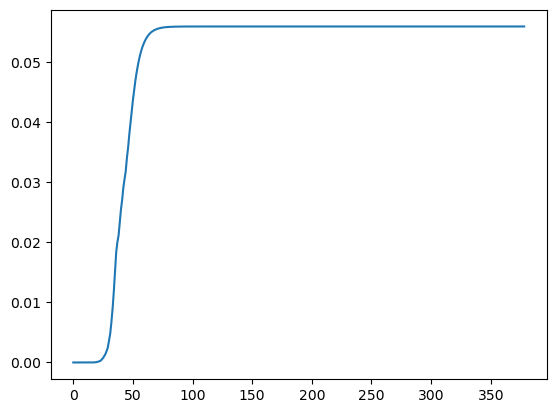

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfd8ed2190>

In [9]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

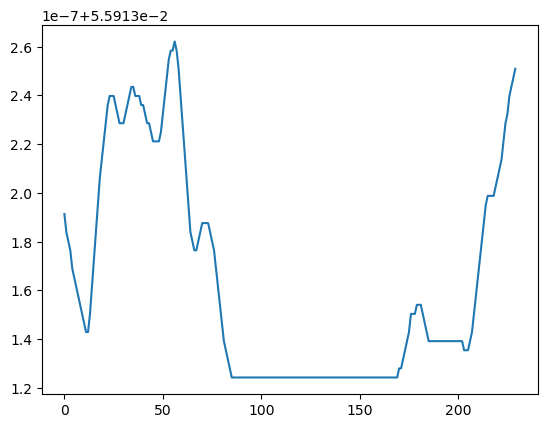

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfd56bf190>

In [10]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,150:end])

In [21]:
@time sol = solve(prob, Tsit5(), reltol = 1e-12)

 20.591117 seconds (25.36 M allocations: 1.207 GiB, 2.98% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 405-element Array{Float32,1}:
   0.0
   1.0f-6
   8.413867f-6
   5.1425213f-5
   0.00024772706
   0.0009696785
   0.0035358486
   0.011013798
   0.02679477
   0.055688616
   0.11094137
   0.17637524
   0.27431515
   ⋮
 485.86197
 487.1835
 488.5052
 489.827
 491.14886
 492.47073
 493.7925
 495.11414
 496.4357
 497.75748
 499.07928
 500.0
u: 405-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.

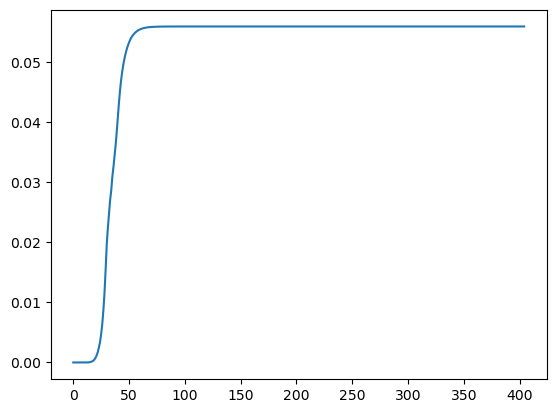

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf7eff35d0>

In [22]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

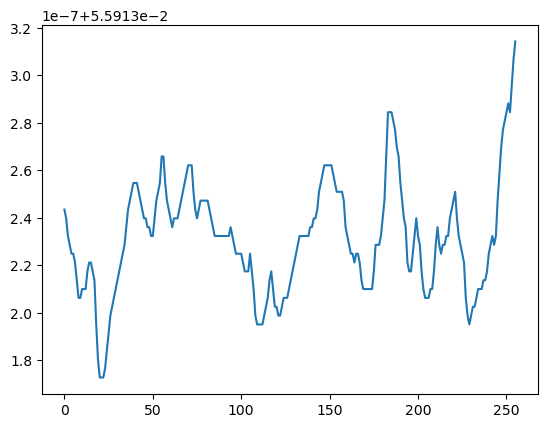

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf7ee98610>

In [24]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,150:end])

In [31]:
@time sol = solve(prob,alg=Tsit5(), reltol = 1e-2)

OutOfGPUMemoryError: Out of GPU memory trying to allocate 468.750 KiB
Effective GPU memory usage: 100.00% (11.172 GiB/11.172 GiB)
CUDA allocator usage: 11.017 GiB
BinnedPool usage: 11.017 GiB (11.017 GiB allocated, 0 bytes cached)


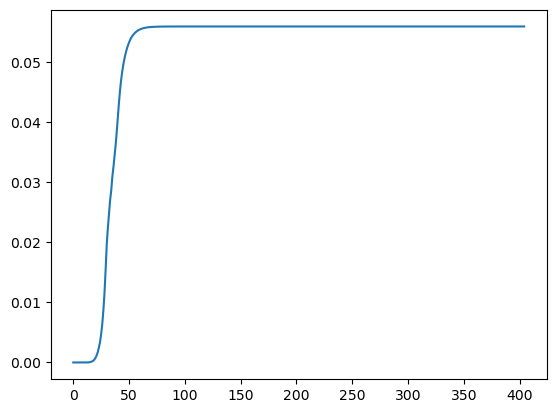

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf7a3f05d0>

In [32]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

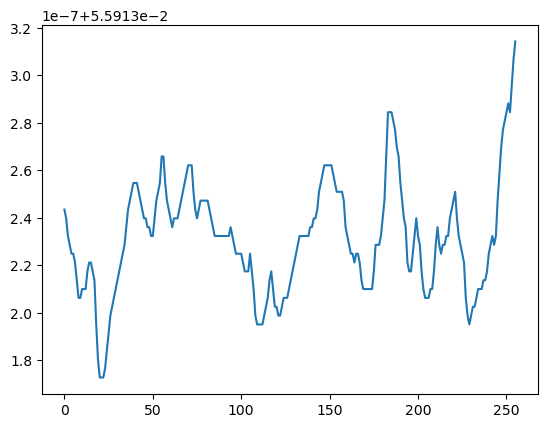

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfd8ee3690>

In [33]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,150:end])

In [28]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12)

 12.209035 seconds (12.96 M allocations: 652.716 MiB, 1.97% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 405-element Array{Float32,1}:
   0.0
   1.0f-6
   8.413867f-6
   5.1425213f-5
   0.00024772706
   0.0009696785
   0.0035358486
   0.011013798
   0.02679477
   0.055688616
   0.11094137
   0.17637524
   0.27431515
   ⋮
 485.86197
 487.1835
 488.5052
 489.827
 491.14886
 492.47073
 493.7925
 495.11414
 496.4357
 497.75748
 499.07928
 500.0
u: 405-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.

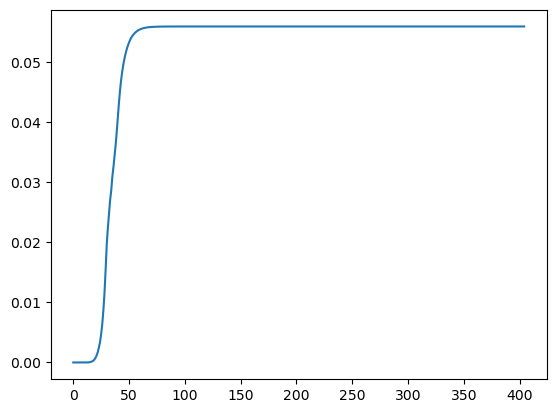

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf7dd24ad0>

In [29]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

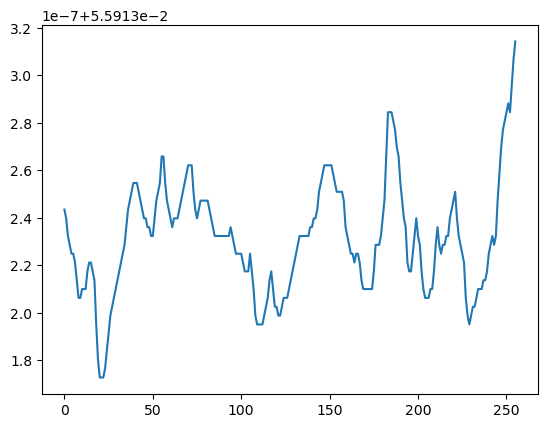

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf7cf53cd0>

In [30]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,150:end])

In [19]:
# @time sol = solve(prob, reltol = 1e-12)

In [20]:
# plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

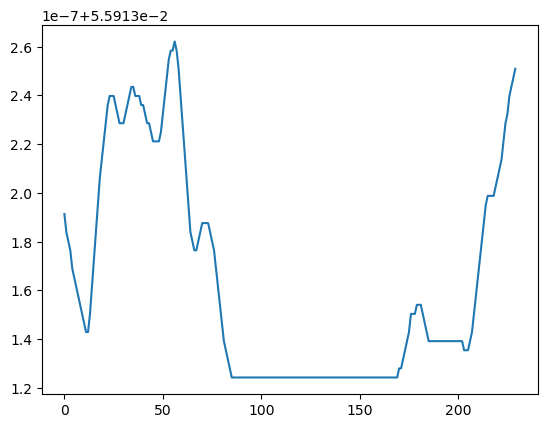

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfd56bf190>

In [10]:
# plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,150:end])

# bm

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-1)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), abstol = 1e-12)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), abstol = 1e-1)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12, abstol = 1e-1)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12, abstol = 1e-12)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-1, abstol = 1e-12)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-1, abstol = 1e-1)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])